# Construction d'un réseau de neurones

Un réseau de neurones artificiels est un modèle computationnel inspiré par le fonctionnement du cerveau humain, utilisé pour des tâches d'apprentissage automatique.

### Composants d'un réseau de neurones

1. **Neurones (Nœuds) :**
   - **Unité de base** : Chaque neurone reçoit des signaux d'entrée, les traite et transmet une sortie.
   - **Fonction d'activation** : Appliquée à la somme pondérée des entrées, elle introduit de la non-linéarité au modèle. Des exemples incluent la sigmoïde, ReLU (Rectified Linear Unit), et tanh.

2. **Couches :**
   - **Couche d'entrée** : La première couche, recevant les données d'entrée. Chaque neurone dans cette couche représente une caractéristique d'entrée.
   - **Couches cachées** : Une ou plusieurs couches situées entre l'entrée et la sortie. Elles permettent au réseau de capter des motifs complexes.
   - **Couche de sortie** : La dernière couche, produisant la prédiction ou la sortie du modèle. Le nombre de neurones dans cette couche dépend de la tâche (par exemple, un neurone pour une tâche de classification binaire).

3. **Poids et biais :**
   - **Poids** : Coefficients associés aux connexions entre neurones. Ils modulent l'importance des signaux d'entrée.
   - **Biais** : Valeur ajoutée à la somme pondérée des entrées pour chaque neurone, permettant de décaler la fonction d'activation.
   
   ![Local Image](images/schema_reseau.webp)

### Fonctionnement d'un réseau de neurones

1. **Propagation avant (Forward Propagation) :**
   - **Calcul des sorties de chaque couche** : Les entrées sont multipliées par les poids, les biais sont ajoutés, puis une fonction d'activation est appliquée pour obtenir les sorties des neurones de chaque couche.
   
   ![Local Image](images/schema_reseau2.png)

2. **Fonction de perte (Loss Function) :**
   - **Évaluation de la performance** : Mesure l'écart entre les prédictions du réseau et les valeurs réelles. Des exemples incluent l'erreur quadratique moyenne (MSE) pour les tâches de régression et l'entropie croisée pour les tâches de classification.
   
   ![Local Image](images/loss_function.png)
   ![Local Image](images/entropy.webp)

3. **Rétropropagation (Backpropagation) :**
   - **Calcul du gradient de la perte par rapport aux poids** : Utilise la dérivée de la fonction de perte pour déterminer comment ajuster les poids afin de minimiser l'erreur.
   - **Propagation des gradients** : À partir de la couche de sortie, en remontant jusqu'à la couche d'entrée, les gradients sont calculés et appliqués à chaque couche.
   - **Mise à jour des poids et biais** : Les poids et les biais sont ajustés en fonction des gradients calculés et d'un taux d'apprentissage (learning rate).
   
   ![Local Image](images/backpropagation.png)

### Phases d'apprentissage

1. **Initialisation :**
   - Les poids sont initialisés aléatoirement ou selon une stratégie particulière pour briser la symétrie.

2. **Entraînement :**
   - **Propagation avant** : Les données d'entraînement sont passées à travers le réseau.
   - **Calcul de la perte** : La fonction de perte évalue les prédictions du réseau.
   - **Rétropropagation** : Les gradients de la perte sont calculés et les poids sont ajustés en conséquence.
   - **Itération** : Ce processus est répété pour de nombreux cycles (époques) jusqu'à ce que la perte soit minimisée.

3. **Validation et test :**
   - **Validation croisée** : Les performances du réseau sont évaluées sur des données non vues pendant l'entraînement pour prévenir le surapprentissage (overfitting).
   - **Test final** : Après l'entraînement, le réseau est testé sur un ensemble de test pour évaluer sa capacité à généraliser sur de nouvelles données.

### Applications

Les réseaux de neurones sont utilisés dans diverses applications, telles que :
- **Reconnaissance d'images** : Classification d'images, détection d'objets.
- **Traitement du langage naturel (NLP)** : Traduction automatique, analyse des sentiments.
- **Prédiction de séries temporelles** : Prévisions financières, prévisions météorologiques.
- **Jeux et simulation** : Agents intelligents pour les jeux vidéo, simulation d'environnements complexes.


## Préparation des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
# LabelEncoder transforme les étiquettes catégorielles en valeurs numériques
# StandardScaler normalise les données pour améliorer la performance des algorithmes.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
# KFold permet de réaliser une validation croisée k-fold pour une évaluation robuste du modèle.

# Charger les données
data = pd.read_csv('IRIS.csv')

# Séparer les caractéristiques et les étiquettes
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = data['species'].values

# Encodage des étiquettes
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Encodage one-hot
y = np.eye(3)[y]  # 3 classes

# Normalisation des caractéristiques
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



C:\Users\abdal\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Fonction d'activation et de perte

 - sigmoid(x) : La fonction sigmoïde est une fonction d'activation couramment utilisée dans les réseaux de neurones. Elle prend une entrée x et la transforme en une valeur comprise entre 0 et 1.
 
 À quoi ça sert ?

    - Non-linéarité : La sigmoïde introduit de la non-linéarité dans le réseau, ce qui permet de modéliser des relations complexes.
    
    - Normalisation : Les valeurs de sortie étant limitées entre 0 et 1, cela aide à normaliser les valeurs et à les interpréter comme des probabilités.
    
    - Activation : Utilisée pour activer les neurones des couches cachées, déterminant ainsi leur contribution à la sortie du réseau.
    
 - sigmoid_derivative(x) : La dérivée de la fonction sigmoïde mesure la sensibilité de la fonction à ses entrées. Elle indique comment la sortie de la sigmoïde change par rapport à une petite variation de l'entrée
 
 À quoi ça sert ?

    - Rétropropagation : Pendant la rétropropagation, nous devons calculer les gradients pour mettre à jour les poids du réseau. La dérivée de la sigmoïde est utilisée pour cela.
    
    - Ajustement des Poids : Elle aide à déterminer de combien les poids doivent être ajustés pour minimiser l'erreur.
    
 - softmax(x) : La fonction softmax est utilisée pour la couche de sortie des réseaux de neurones de classification multi-classes. Elle transforme un vecteur de valeurs en un vecteur de probabilités, où la somme des probabilités est égale à 1.

 À quoi ça sert ?

    - Classification Multi-classes : Permet de prédire la probabilité que l'entrée appartienne à chaque classe.
    - Probabilités : Les sorties sont interprétées comme des probabilités, ce qui facilite l'interprétation des résultats.
    
 - cross_entropy_loss(y_true, y_pred) : La fonction de perte d'entropie croisée mesure la différence entre les distributions de probabilités prédite ( ypred ) et réelle ( ytrue ). Elle est utilisée pour évaluer la performance du modèle.

 À quoi ça sert ?

    - Minimisation de l'Erreur : L'objectif de l'entraînement est de minimiser cette perte, afin que les prédictions du modèle soient aussi proches que possible des vraies étiquettes.
    - Gradient Descent : La perte d'entropie croisée fournit une fonction à optimiser lors de la rétropropagation.
    
    
Résumé

    Sigmoïde : Introduit de la non-linéarité et normalise les sorties entre 0 et 1.
    
    Dérivée de la Sigmoïde : Utilisée pour calculer les gradients pendant la rétropropagation.
    
    Softmax : Transforme les sorties en probabilités, utilisée pour la classification multi-classes.
    
    Entropie Croisée : Mesure l'erreur de classification, utilisée comme fonction de perte à minimiser.

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-9), axis=1))


## Initialisation des paramètres

 Définition des Tailles des Couches : 
 
 - input_size : Nombre de caractéristiques en entrée (nombre de colonnes dans X_train). Dans ce cas, nous avons quatre caractéristiques : sepal_length, sepal_width, petal_length et petal_width.

 - hidden_size : Nombre de neurones dans la couche cachée. Ici, nous avons arbitrairement choisi 10 neurones pour cette couche.

 - output_size : Nombre de classes de sortie (nombre de colonnes dans y_train). Puisque nous avons 3 espèces d'iris, output_size est 3.
 
 Initialisation des poids et biais
 
 - np.random.seed(42) : Fixe la graine du générateur de nombres aléatoires pour que les résultats soient reproductibles. En d'autres termes, chaque fois que vous exécutez le code, les mêmes nombres aléatoires seront générés.
 
 - weights_input_hidden : Matrice des poids reliant les neurones de la couche d'entrée aux neurones de la couche cachée. La taille de cette matrice est (input_size, hidden_size), c'est-à-dire (4, 10).

     - Les valeurs sont initialisées aléatoirement à partir d'une distribution normale.

 - bias_hidden : Vecteur de biais pour la couche cachée. Sa taille est (1, hidden_size), c'est-à-dire (1, 10).

     - Les valeurs sont initialisées à zéro.
     
 - weights_hidden_output : Matrice des poids reliant les neurones de la couche cachée aux neurones de la couche de sortie. La taille de cette matrice est (hidden_size, output_size), c'est-à-dire (10, 3).

     - Les valeurs sont initialisées aléatoirement à partir d'une distribution normale.

 - bias_output : Vecteur de biais pour la couche de sortie. Sa taille est (1, output_size), c'est-à-dire (1, 3).

     - Les valeurs sont initialisées à zéro.

In [3]:
input_size = X_train.shape[1]
hidden_size = 10  # Nombre de neurones dans la couche cachée
output_size = y_train.shape[1]

np.random.seed(42)

weights_input_hidden = np.random.randn(input_size, hidden_size)
bias_hidden = np.zeros((1, hidden_size))

weights_hidden_output = np.random.randn(hidden_size, output_size)
bias_output = np.zeros((1, output_size))


## Propagation avant

 - Entrées : Les données X passent à travers les poids et les biais pour chaque couche.
 - Transformations : Chaque couche effectue une transformation linéaire suivie d'une application de fonction d'activation.
 - Sorties : Le résultat final est une matrice de probabilités pour chaque classe, permettant de faire des prédictions.

In [4]:
def forward_propagation(X):
    z1 = np.dot(X, weights_input_hidden) + bias_hidden
    a1 = sigmoid(z1)
    z2 = np.dot(a1, weights_hidden_output) + bias_output
    a2 = softmax(z2)
    return z1, a1, z2, a2


## Rétropropagation

et mise à jour des poids 

La rétropropagation (backpropagation) est l'étape où les gradients de la fonction de perte par rapport aux paramètres du réseau (poids et biais) sont calculés. Ces gradients sont ensuite utilisés pour ajuster les paramètres afin de minimiser la fonction de perte.

In [5]:
def backward_propagation(X, y, z1, a1, z2, a2):
    m = y.shape[0]
    dz2 = a2 - y
    dw2 = np.dot(a1.T, dz2) / m
    db2 = np.sum(dz2, axis=0, keepdims=True) / m

    dz1 = np.dot(dz2, weights_hidden_output.T) * sigmoid_derivative(a1)
    dw1 = np.dot(X.T, dz1) / m
    db1 = np.sum(dz1, axis=0, keepdims=True) / m

    return dw1, db1, dw2, db2

def update_parameters(dw1, db1, dw2, db2, learning_rate):
    global weights_input_hidden, bias_hidden, weights_hidden_output, bias_output
    weights_input_hidden -= learning_rate * dw1
    bias_hidden -= learning_rate * db1
    weights_hidden_output -= learning_rate * dw2
    bias_output -= learning_rate * db2


## Entrainement du modèle

In [6]:
def train(X, y, epochs, learning_rate):
    for epoch in range(epochs): # Epochs : Nombre de fois que le modèle va voir l'intégralité du jeu de données pendant l'entraînement
        z1, a1, z2, a2 = forward_propagation(X)
        dw1, db1, dw2, db2 = backward_propagation(X, y, z1, a1, z2, a2) # Obtenir les gradients nécessaires pour ajuster les poids et les biais afin de minimiser l'erreur
        update_parameters(dw1, db1, dw2, db2, learning_rate)

        if epoch % 100 == 0:
            loss = cross_entropy_loss(y, a2) # fonction de perte à minimiser
            print(f'Epoch {epoch}, Loss: {loss}')

# Entraîner le modèle
train(X_train, y_train, epochs=1000, learning_rate=0.01)


Epoch 0, Loss: 1.222150296257761
Epoch 100, Loss: 0.7924160627551444
Epoch 200, Loss: 0.6422625566723449
Epoch 300, Loss: 0.5703628126635825
Epoch 400, Loss: 0.52389672928082
Epoch 500, Loss: 0.4900745388188422
Epoch 600, Loss: 0.46391578073892226
Epoch 700, Loss: 0.44283398974156374
Epoch 800, Loss: 0.4253103346200555
Epoch 900, Loss: 0.4103871337085289


## Evaluation du modèle

afin de valider la performance du réseau de neurones sur des données qu'il n'a pas vues pendant l'entraînement, ce qui est crucial pour évaluer sa capacité de généralisation.

In [7]:
def predict(X):
    _, _, _, a2 = forward_propagation(X)
    return np.argmax(a2, axis=1)

# Prédictions sur l'ensemble de test
y_pred = predict(X_test)
y_true = np.argmax(y_test, axis=1)

# Calcul de la précision
accuracy = np.mean(y_pred == y_true)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9333333333333333


## Validation croisée

La validation croisée est une méthode d'évaluation des performances d'un modèle en le testant sur plusieurs sous-ensembles des données.

In [8]:
def cross_validation(X, y, k, epochs, learning_rate):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    accuracies = []
    i = 1
    
    for train_index, test_index in kf.split(X):
        print("################### ITERATION ", i, "###################")
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Réinitialiser les poids et les biais pour chaque pli
        input_size = X_train.shape[1]
        hidden_size = 10  # Nombre de neurones dans la couche cachée
        output_size = y_train.shape[1]

        np.random.seed(42)
        global weights_input_hidden, bias_hidden, weights_hidden_output, bias_output
        weights_input_hidden = np.random.randn(input_size, hidden_size)
        bias_hidden = np.zeros((1, hidden_size))
        weights_hidden_output = np.random.randn(hidden_size, output_size)
        bias_output = np.zeros((1, output_size))
        
        # Entraîner le modèle
        train(X_train, y_train, epochs, learning_rate)
        
        # Prédictions et évaluation
        y_pred = predict(X_test)
        y_true = np.argmax(y_test, axis=1)
        accuracy = np.mean(y_pred == y_true)
        accuracies.append(accuracy)
        
        i += 1
    
    print(f'Moyenne Accuracy: {np.mean(accuracies)}, écart type: {np.std(accuracies)}')
    
    return accuracies

# Exemple d'utilisation
accuracies = cross_validation(X, y, k=10, epochs=1000, learning_rate=0.01)


################### ITERATION  1 ###################
Epoch 0, Loss: 1.2673754648586921
Epoch 100, Loss: 0.7937794165686868
Epoch 200, Loss: 0.6403415050491592
Epoch 300, Loss: 0.5683647998731604
Epoch 400, Loss: 0.5216778653567209
Epoch 500, Loss: 0.4875748726059214
Epoch 600, Loss: 0.461133057905937
Epoch 700, Loss: 0.43978478694886725
Epoch 800, Loss: 0.42201723466113467
Epoch 900, Loss: 0.4068737352979289
################### ITERATION  2 ###################
Epoch 0, Loss: 1.2027918478606554
Epoch 100, Loss: 0.7883151206089579
Epoch 200, Loss: 0.6381780902107793
Epoch 300, Loss: 0.5649591241196904
Epoch 400, Loss: 0.5175224229139769
Epoch 500, Loss: 0.4829662629670181
Epoch 600, Loss: 0.4562227577494464
Epoch 700, Loss: 0.43466131802310953
Epoch 800, Loss: 0.41673859877790487
Epoch 900, Loss: 0.4014819381730705
################### ITERATION  3 ###################
Epoch 0, Loss: 1.2820085809931032
Epoch 100, Loss: 0.7979161521800313
Epoch 200, Loss: 0.6423058484239904
Epoch 300, Loss:

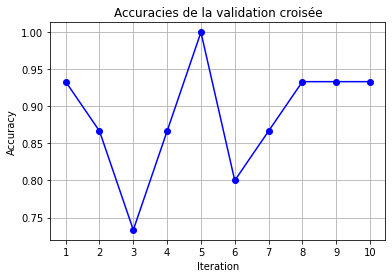

In [10]:
# Tracer un graphique linéaire des précisions
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracies de la validation croisée')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(accuracies) + 1))
plt.grid(True)
plt.show()

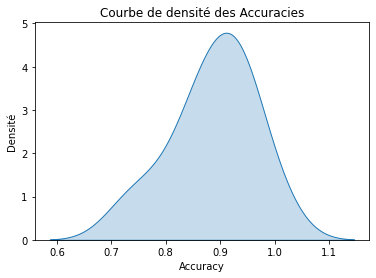

In [11]:
# Tracer la courbe de densité des précisions
sns.kdeplot(accuracies, fill=True)
plt.title('Courbe de densité des Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Densité')
plt.show()